In [6]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the system
numerator = [1]
denominator = [5, 1]
system = ctrl.TransferFunction(numerator, denominator)

# Define time vector
time = np.linspace(0, 20, 1000) # Increased resolution of the time vector

def plot_step_response(Kp, Ki, Kd, time):
    # Create PID controller with the same time base as the system
    pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

    # Connect the system and controller
    open_loop_system = ctrl.series(pid_controller, system)

    # Create a closed-loop system
    closed_loop_system = ctrl.feedback(open_loop_system)

    # Step response of the closed-loop system
    _, response = ctrl.step_response(closed_loop_system, time)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(time, response, label='System Response')
    plt.axhline(y=1, color='r', linestyle='--', label='Target')
    plt.title('Step Response of PID-controlled System')
    plt.xlabel('Time (seconds)')
    plt.ylabel('System Response')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sliders for PID parameters
interact(lambda Kp, Ki, Kd: plot_step_response(Kp, Ki, Kd, time),
         Kp=FloatSlider(value=1.0, min=0, max=100.0, step=0.01),
         Ki=FloatSlider(value=0.0, min=0, max=50.0, step=0.01),
         Kd=FloatSlider(value=0.0, min=0, max=20.0, step=0.01))

interactive(children=(FloatSlider(value=1.0, description='Kp', step=0.01), FloatSlider(value=0.0, description=…

<function __main__.<lambda>(Kp, Ki, Kd)>

Optimal PID Parameters: [5.14734362e+15 3.31530933e+15 3.83394282e+16]


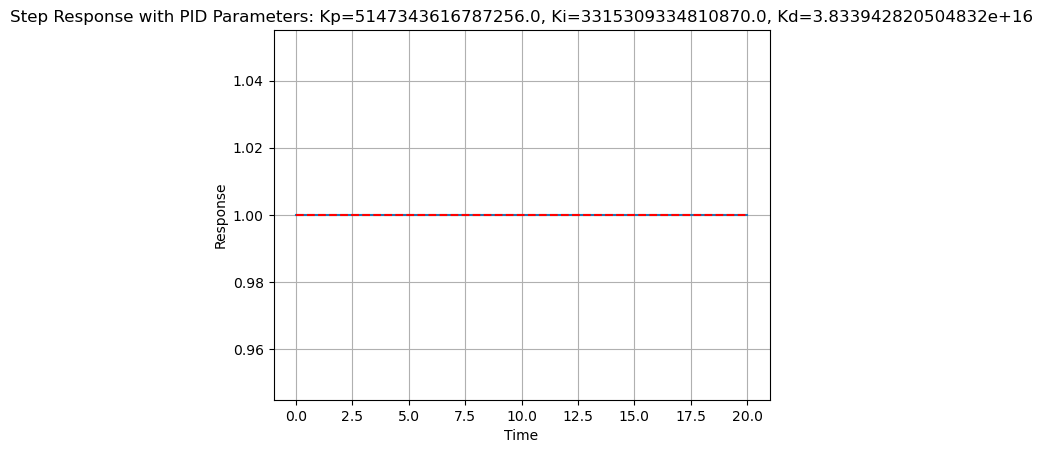

In [11]:
import numpy as np
import control as ctrl
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def plot_step_response(Kp, Ki, Kd, time):
    pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    open_loop_system = ctrl.series(pid_controller, system)
    closed_loop_system = ctrl.feedback(open_loop_system)
    t, response = ctrl.step_response(closed_loop_system, time)
    plt.plot(t, response)
    plt.plot(time, desired_response, 'r--')  # Desired response as a dashed red line
    plt.title(f"Step Response with PID Parameters: Kp={Kp}, Ki={Ki}, Kd={Kd}")
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.grid(True)
    plt.show()

# Define the system
numerator = [1]
denominator = [5, 1]
system = ctrl.TransferFunction(numerator, denominator)

time = np.linspace(0, 20, 1000) # Increased resolution of the time vector

# Define the desired step response
desired_response = np.ones(1000)  # Assuming a step response of 1 for all t

# Define the objective function to minimize
def objective_function(pid_params, system, time, desired_response):
    Kp, Ki, Kd = pid_params
    pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    open_loop_system = ctrl.series(pid_controller, system)
    closed_loop_system = ctrl.feedback(open_loop_system)
    _, response = ctrl.step_response(closed_loop_system, time)
    # Calculate the error (e.g., mean squared error)
    error = np.mean((response - desired_response)**2)
    return error

# Define time vector
time = np.linspace(0, 20, 1000)  # Increased resolution of the time vector

# Initial guess for PID parameters
initial_pid_params = [0.0, 0.0, 0.0]  # [Kp, Ki, Kd]

# Perform the optimization using the Nelder-Mead method
result = minimize(
    objective_function,
    initial_pid_params,
    args=(system, time, desired_response),
    method='Nelder-Mead'
)

optimal_params = result.x
print("Optimal PID Parameters:", optimal_params)
Kp, Ki, Kd = optimal_params

# Plot the step response with the optimized PID parameters
plot_step_response(Kp, Ki, Kd, time)